**Adult** **Income** **Visualization**

The source of my dataset is UCI Machine Learning repository. This is an opensource library with many cool data sets. I have selected the Adult income data set - https://archive.ics.uci.edu/ml/datasets/Adult

In general I am passionate about social equity issues and hence, have chosen this dataset to visualise how adult incomes in the US vary with features like occupation, age, country of origin etc.
The dataset provides fourteen input variables (aka features) that are a mixture of categorical, ordinal and numerical data types. The output label in this dataset is income levels (either >50K or <= 50K). This is a binary classification problem. The complete list of variables is as follows:


*   Age
*   Workclass
*   Education
*   Education Number of Years
*   Marital-status
*   Occupation
*   Relationship
*   Race
*   Sex
*   Capital-gain
*   Capital-loss
*   Hours-per-week
*   Native-country




**Note:**
For the purpose of this exercise, please ignore the Python code and focus on the text and visualizations(unless you enjoy reading code :) )
The visualizations can be presented to an end user in a myriad of ways- a report, a dashboard, a ppt etc. I personally prefer visualizations in the form of dashboards: after all a picture is worth a thousand words.




In [0]:
#Importing the necessary visualisation adn data analysis libraries
import pandas as pd
import numpy as np
import math
import statsmodels as sm
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt

Sometimes the easiest way to see data is to actually skim over it in it's original form. i.e as a table with rows and columns. Hence, I have printed the first few rows of the dataset.

In [23]:
original_data = pd.read_csv(
    "adult.data.txt",
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Income"], sep=r'\s*,\s*', engine='python', na_values="?")
original_data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Next, I visualize the distributions of each of the features in the form of a histogram or barchart to see which direction are the features skewed in. By eyeballing the histograms, the viewer can get a sense of statistics like the most likely educational level of working adults, most common occupation, median age, salary distribution etc.

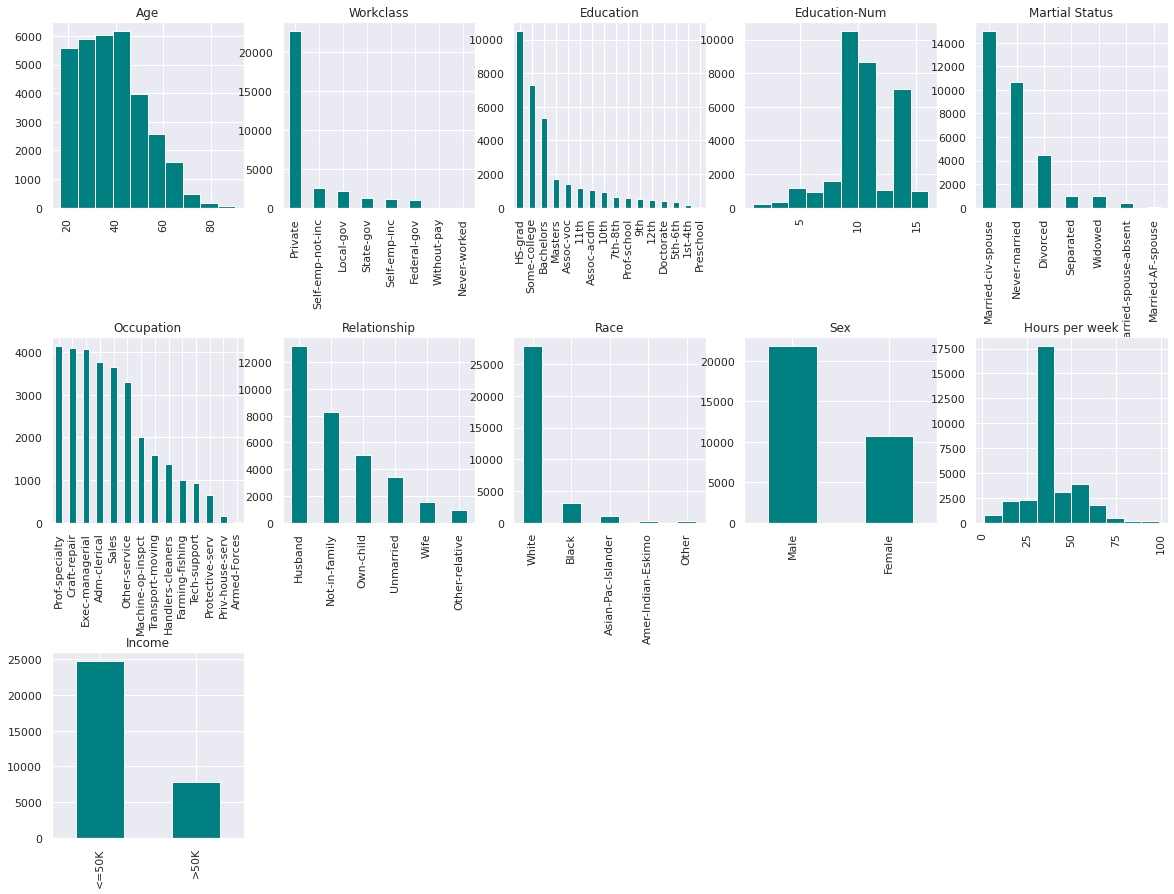

In [24]:
fig = plt.figure(figsize=(20,15))
cols = 5
rows = math.ceil(float(original_data.shape[1]) / cols)
for i, column in enumerate([
        "Age", "Workclass", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex",
        "Hours per week", "Income"]):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if original_data.dtypes[column] == np.object:
        original_data[column].value_counts().plot(kind="bar", axes=ax, color = "teal")
    else:
        original_data[column].hist(axes=ax, color = "teal")
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

I also like to use heat maps and correlation matrices for visualization. Heatmaps are very intuitive visual aids and help in quickly identifying attributes that are highly correlated to each other. For instance, in the heatmap below, education level, and age display a higher correlation to income. This stands out pretty clearly.

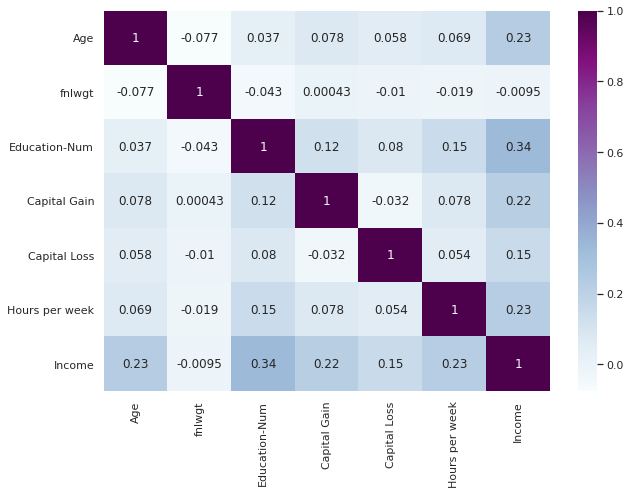

In [25]:
original_data.Income = LabelEncoder().fit_transform(original_data.Income)
plt.rcParams['figure.figsize'] = [10,7]
sns.heatmap(original_data.corr(), annot = True, cmap="BuPu")

Now since, we see education as one of the most important features, we can zoom into this and plot more graphs like a more specific barchart to visualize how education impacts income.

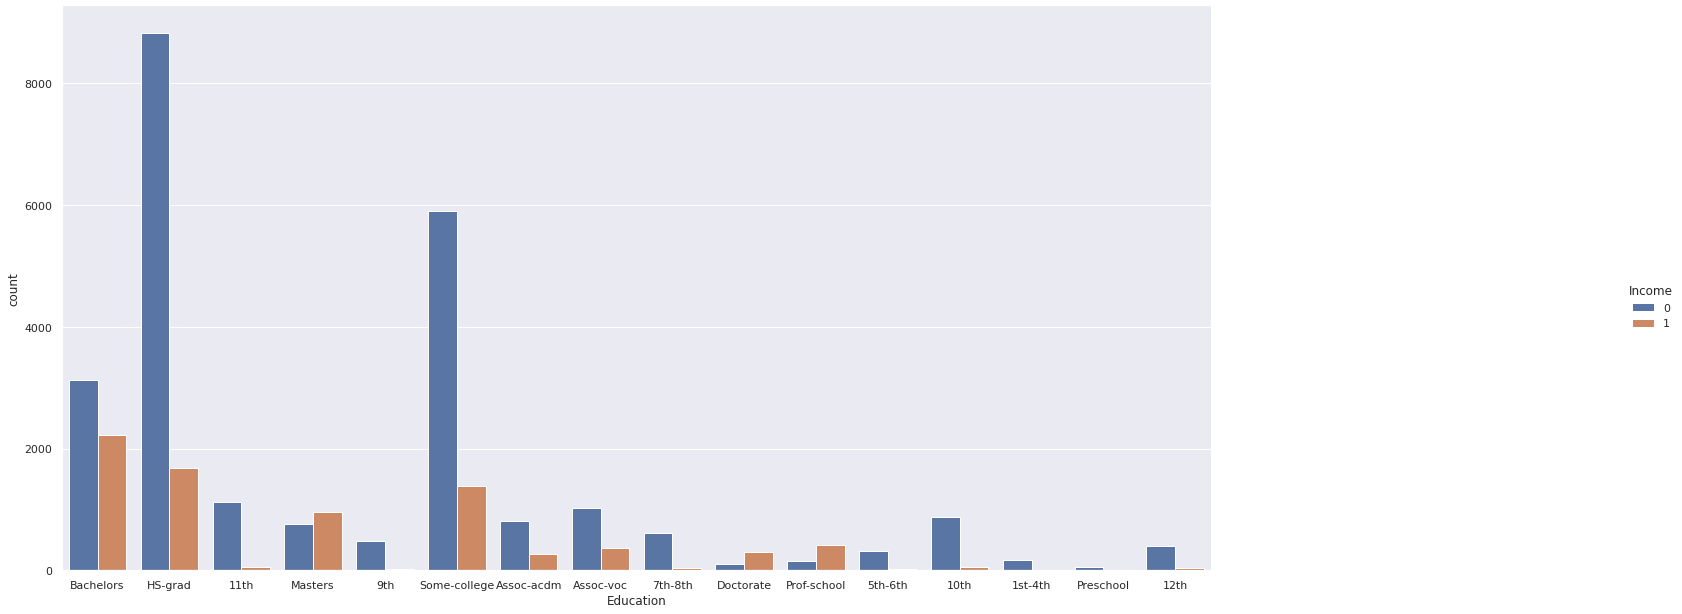

In [26]:

sns.catplot(x="Education", hue="Income", data=original_data, kind="count", height=4, aspect=.7)
plt.gcf().set_size_inches(30, 10)

Income levels are also linked to race. So a plot to visualize that will be helpful.

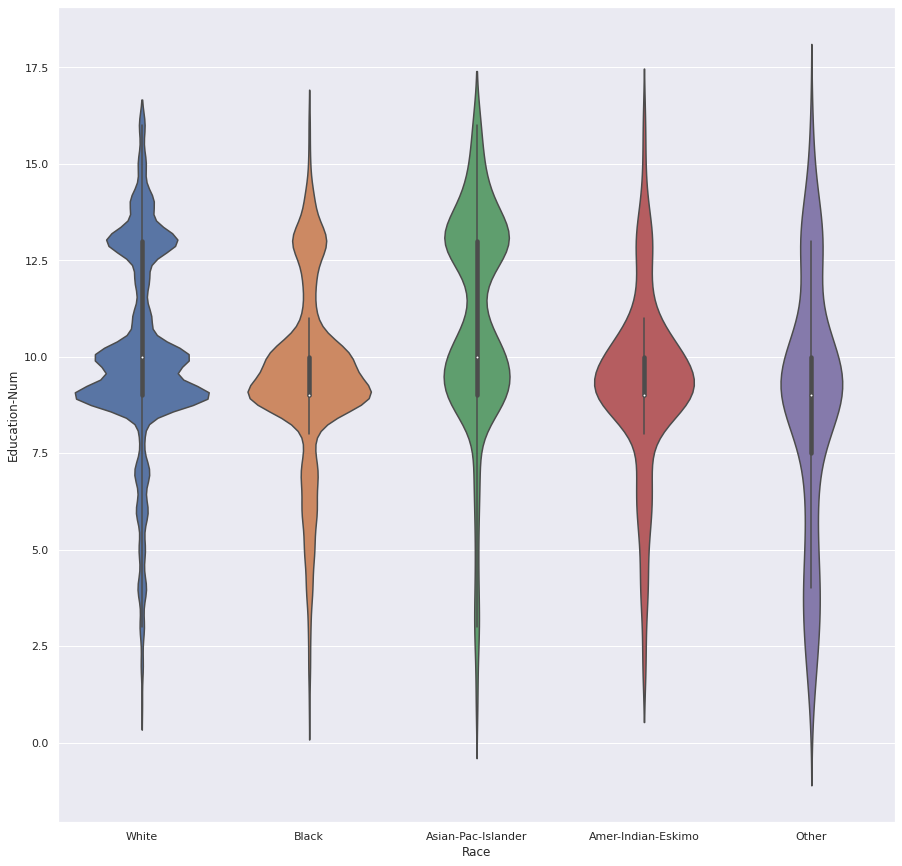

In [27]:
#  Parameters
plt.rcParams['figure.figsize'] = [15,15]
sns.set(style = 'darkgrid')

# This Violin plot shows how education varies with race

plt.subplot(1,1,1)
sns.violinplot(x = original_data['Race'], y = original_data['Education-Num'], data = original_data);

I have tried to present a few visualization ideas here. These represent a very small subset of visualization techiques that can be applied to this dataset. I like using Python and R data visualization libraries like Seaborn, Matplotlib, ggplot etc. These tools are opensource and have ample documentation and learning communities online.